titanic datasını okuyunuz(<b>train.csv</b>). Ödevin geri kalanında dataframe gösterimlerini <b>display()</b> fonksiyonunu kullanarak yapınız.<br> Örn: display(titanic_df)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_titanic=pd.read_csv("train.csv")
df_titanic_nan=pd.read_csv("train_missing.csv")

In [3]:
display(df_titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Soru 1:

Kazada ölenlerin yaş ortalamasını bulunuz

In [6]:
df_titanic[df_titanic['Survived'] == 0].groupby(['Survived'],as_index=False)['Age'].mean().rename(
    columns={'Age':'Age_Mean'}).style.hide_index()

Survived,Age_Mean
0,30.626179


Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [7]:
df_titanic[df_titanic['Survived'] == 0].groupby(['Survived'],as_index=False).agg(
    {'Fare': ['mean', 'median']}).style.hide_index()

Kazada ölen erkeklerin yaş ortalamasını bulunuz


In [8]:
df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] =='male' )].groupby(
    ['Survived','Sex'],as_index=False)['Age'].mean().rename(columns={'Age':'Age_Mean'}).style.hide_index()

Survived,Sex,Age_Mean
0,male,31.618056


Kazada ölen Kadınların yaş ortalamasını bulunuz

In [9]:
df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] =='female' )].groupby(
    ['Survived','Sex'],as_index=False)['Age'].mean().rename(columns={'Age':'Age_Mean'}).style.hide_index()

Survived,Sex,Age_Mean
0,female,25.046875


# Soru 2:

Kazadan kurtulanların yaş ortalamasını bulunuz

In [10]:
df_titanic[df_titanic['Survived'] == 1].groupby(['Survived'],as_index=False)['Age'].mean().rename(
    columns={'Age':'Age_Mean'}).style.hide_index() 

Survived,Age_Mean
1,28.343690


Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz


In [11]:
df_titanic[df_titanic['Survived'] == 1].groupby(['Survived'],as_index=False)['Fare'].mean().rename(
    columns={'Fare':'Fare_Mean'}).style.hide_index()

Survived,Fare_Mean
1,48.395408


Kazadan kurtulan toplam kişi sayısını bulunuz

In [12]:
len(df_titanic[df_titanic['Survived']==1])

342

Kazadan kurtulan erkeklerin yaş ortalamasını bulunuz

In [13]:
df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] =='male' )].groupby(
    ['Survived','Sex'],as_index=False)['Age'].mean().rename(columns={'Age':'Age_Mean'}).style.hide_index()

Survived,Sex,Age_Mean
1,male,27.276022


Kazadan kurtulan kadınların yaş ortalamasını bulunuz

In [14]:
df_titanic[(df_titanic['Survived']) == 1 & (df_titanic['Sex'] =='female') ].groupby(
    ['Survived','Sex'],as_index=False)['Age'].mean().rename(columns={'Age':'Age_Mean'}).style.hide_index()

Survived,Sex,Age_Mean
0,male,31.618056
1,female,28.847716


# Soru 3: 

10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [15]:
df_titanic[df_titanic['Age'] < 10 ].groupby(['Age'],as_index=False)['Fare'].median().rename(
    columns={'Fare':'Fare_Median'}).style.hide_index()

Age,Fare_Median
0.420000,8.516700
0.670000,14.500000
0.750000,19.258300
0.830000,23.875000
0.920000,151.550000
1.000000,37.004200
2.000000,26.950000
3.000000,23.537500
4.000000,25.450000
5.000000,23.504150


10 yaşından büyüklerin bilet fiyatlarının medyan değerini bulunuz

In [16]:
df_titanic[df_titanic['Age'] > 10 ].groupby(['Age'],as_index=False)['Fare'].median().rename(
    columns={'Fare':'Fare_Median'}).style.hide_index()


Age,Fare_Median
11.000000,39.087500
12.000000,11.241700
13.000000,13.364600
14.000000,34.879150
14.500000,14.454200
15.000000,8.029200
16.000000,18.000000
17.000000,8.662500
18.000000,11.500000
19.000000,10.170800


# Soru 5:

1.sınıf, 2.sınıf ve 3.sınıf yolcuların ölüm oranlarını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>


In [17]:
 def calculate(df_titanic):
    deads= len(df_titanic[df_titanic['Survived']==0])
    total = len(df_titanic['Survived'])

    return (deads / total)*100

print("3.sınıf bilet sahibi gemide alt kısımlarda olduğu için batma anında ölüm oranı daha fazla oldu.Filikalarda gemininüst kısmında olduğundan ilk 1.sınıf bilet sahiplerini aldılar")
display(df_titanic.groupby('Pclass').apply(calculate).reset_index(name='Death Rate').style.hide_index())


3.sınıf bilet sahibi gemide alt kısımlarda olduğu için batma anında ölüm oranı daha fazla oldu.Filikalarda gemininüst kısmında olduğundan ilk 1.sınıf bilet sahiplerini aldılar


Pclass,Death Rate
1,37.037037
2,52.717391
3,75.763747


1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarını karşılaştırınız

In [18]:
display(df_titanic.groupby(['Pclass'],as_index=False)['Fare'].median().rename(columns={'Fare':'Fare_Median'}).style.hide_index())
print("1.sınıf bilet fiyatları ortalama olarak en pahalı iken 3.sınıf bilet fiyatı ise en ucuz")

Pclass,Fare_Median
1,60.287500
2,14.250000
3,8.050000


1.sınıf bilet fiyatları ortalama olarak en pahalı iken 3.sınıf bilet fiyatı ise en ucuz


# Soru 6:

Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [19]:
 def calculate(df_titanic):
    deads= len(df_titanic[df_titanic['Survived']==0])
    total = len(df_titanic['Survived'])

    return (deads / total)*100

display(df_titanic.groupby('Sex').apply(calculate).reset_index(name='Death Rate').style.hide_index())

print("İlk kadınlar ve çocuklar filikalara bindirildi bu yüzden ölüm oranı kadınların daha düşük")

Sex,Death Rate
female,25.796178
male,81.109185


İlk kadınlar ve çocuklar filikalara bindirildi bu yüzden ölüm oranı kadınların daha düşük


# Soru 7:

Kazada ölen erkeklerin ortalama bilet fiyatı ile kurtulan erkeklerin ortalama bilet fiyatını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [20]:
display(df_titanic[df_titanic['Sex'] =='male'].groupby(['Survived'],as_index=False)['Fare'].mean().rename(
    columns={'Fare':'Fare_Mean'}).style.hide_index())
print("Kurtulan erkeklerin bilet fiyat ortalaması kurtulamayanlara oranla daha fazla.Bu durumda benzer olarak bilet fiyatı arttıkça üst sınıflarda bilet alabiliyorsun.Gemi batarken 1.sınıf yolcuların kurtulma oranı ile 3.sınıfların kurtulma oranı ile bağlantılı seyrediyor")

Survived,Fare_Mean
0,21.960993
1,40.821484


Kurtulan erkeklerin bilet fiyat ortalaması kurtulamayanlara oranla daha fazla.Bu durumda benzer olarak bilet fiyatı arttıkça üst sınıflarda bilet alabiliyorsun.Gemi batarken 1.sınıf yolcuların kurtulma oranı ile 3.sınıfların kurtulma oranı ile bağlantılı seyrediyor


# Missing Value Doldurma

Bundan sonraki soruları <b>train_missing.csv</b> datasını kullanarak cevaplayınız.

In [21]:
df_titanic_nan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp          170
Parch            0
Ticket           0
Fare            91
Cabin          687
Embarked       173
dtype: int64

# Soru 8

Age, Embarked ve Fare değişkenlerini mean/median/mode değerlerini kullanarak değişken tipine uygun olacak şekilde doldurunuz.

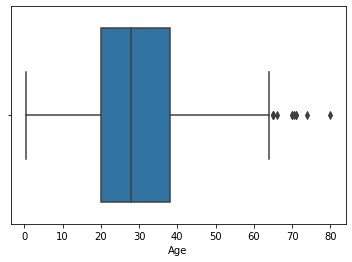

In [22]:
import seaborn as sns
sns.boxplot(x=df_titanic_nan['Age']) #Age sütununda outliers var

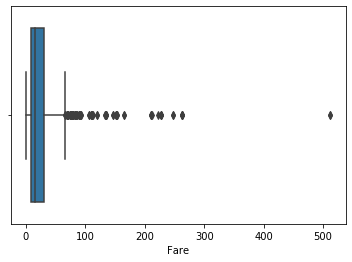

In [23]:
sns.boxplot(x=df_titanic_nan['Fare'])  #Fare sütununda outliers var

In [24]:
df_titanic_nan.Age.isnull().sum(),df_titanic_nan.Embarked.isnull().sum(),df_titanic_nan.Fare.isnull().sum()

(177, 173, 91)

In [25]:
print("Age",df_titanic_nan.Age.mean(),df_titanic_nan.Age.median())
print("Fare:",df_titanic_nan.Fare.mean(), df_titanic.Fare.median())
print("Embarked:",df_titanic_nan.Embarked.mode()[0])

Age 29.69911764705882 28.0
Fare: 31.844821874999965 14.4542
Embarked: S


In [26]:
df_titanic_1=df_titanic_nan.copy()

In [27]:
df_titanic_1['Age']=df_titanic_1['Age'].fillna(value=df_titanic_1['Age'].median()) #MEDIAN : Outlier olan data için uygun yerleştirme
df_titanic_1.Age.isnull().sum()

0

In [28]:
df_titanic_1['Fare'] = df_titanic_1['Fare'].fillna(df_titanic_1.groupby('Pclass')['Fare'].transform('median')) #MEDIAN : Outlier olan data için uygun yerleştirme
df_titanic_1.Fare.isnull().sum()

0

In [29]:
df_titanic_1.Embarked = df_titanic_1.Embarked.fillna(df_titanic_1.Embarked.mode()[0])
df_titanic_1.Embarked.isnull().sum()

0

In [30]:
df_titanic_1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0.0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,NaN,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,NaN,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0,237736,30.0708,NaN,C


# Soru 9

SibSp değişkeni hangi yöntemler ile doldurulabilir, fikir yürütün. Uygun bir yöntem ile doldurun. (SibSp değişkeni kişilerin gemide bulunan kardeş/eş sayısını belirtiyor.)

In [31]:
df_titanic_2=df_titanic_nan.copy()

In [32]:
df_titanic_3=df_titanic_2["Name"].str.split(",", n = 1, expand = True) 
df_titanic_2["Last Name"]= df_titanic_3[0] 
df_titanic_2["First Name"]= df_titanic_3[1]   
df_titanic_2.drop(columns =["Name"], inplace = True) 


In [33]:
df_titanic_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,male,22.0,1.0,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1.0,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1.0,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0.0,0,373450,8.0500,NaN,NaN,Allen,Mr. William Henry


In [34]:
df_titanic_2[df_titanic_2.SibSp.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
7,8,0,3,male,2.0,NaN,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,female,27.0,NaN,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
14,15,0,3,female,14.0,NaN,0,350406,7.8542,NaN,NaN,Vestrom,Miss. Hulda Amanda Adolfina
22,23,1,3,female,15.0,NaN,0,330923,8.0292,NaN,Q,McGowan,"Miss. Anna ""Annie"""
30,31,0,1,male,40.0,NaN,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don. Manuel E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,female,44.0,NaN,0,244252,26.0000,NaN,S,Carter,Mrs. Ernest Courtenay (Lilian Hughes)
862,863,1,1,female,48.0,NaN,0,17466,25.9292,D17,S,Swift,Mrs. Frederick Joel (Margaret Welles Barron)
878,879,0,3,male,NaN,NaN,0,349217,7.8958,NaN,S,Laleff,Mr. Kristo
879,880,1,1,female,56.0,NaN,1,11767,83.1583,C50,C,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson)


In [35]:
from scipy import stats

In [36]:
df_titanic_2['SibSp'] = df_titanic_2['SibSp'].fillna(df_titanic_2.groupby(['Last Name'])['SibSp'].apply(stats.mode))
df_titanic_2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,male,22.0,1.0,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1.0,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1.0,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0.0,0,373450,8.0500,NaN,NaN,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0.0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,female,19.0,0.0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,female,NaN,1.0,2,W./C. 6607,NaN,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0.0,0,111369,30.0000,C148,NaN,Behr,Mr. Karl Howell


# Soru 10

Datayı baştan okuyun. Embarked değişkenini "NAN" şeklinde yeni bir kategorisi olacak şekilde doldurun.

In [37]:
df_titanic_3=df_titanic_nan.copy()
df_titanic_3[df_titanic_3.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,NaN,0,350406,7.8542,NaN,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0.0,0,2649,7.2250,NaN,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0.0,0,2631,7.2250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0.0,0,345777,9.5000,NaN,NaN
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0.0,0,349248,7.8958,NaN,NaN
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0.0,0,SOTON/OQ 392076,7.0500,NaN,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,NaN,NaN,NaN


In [38]:
df_titanic_3[["Embarked"]].fillna("NAN")

,Embarked
0,S
1,C
2,NAN
3,S
4,NAN
...,...
886,S
887,S
888,S
889,NAN


# Soru 11

"Fare" değişkeni için "Fare_Missing" adında yeni bir değişken türetip "Fare" değişkenini median ile doldurun.

In [39]:
df_titanic_4=df_titanic_nan.copy()

In [40]:
df_titanic_4[df_titanic_4.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0,113783,NaN,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0.0,0,A/5. 2151,NaN,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0.0,0,244373,NaN,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1.0,0,113789,NaN,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1.0,0,7546,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,NaN,0,S.O./P.P. 3,NaN,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2,CA. 2343,NaN,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0.0,0,695,NaN,B51 B53 B55,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,NaN,NaN,NaN


In [41]:
df_titanic_4.loc[df_titanic_nan.Fare[df_titanic_nan.Fare.isnull()].index.to_list()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0,113783,NaN,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0.0,0,A/5. 2151,NaN,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0.0,0,244373,NaN,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1.0,0,113789,NaN,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1.0,0,7546,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,NaN,0,S.O./P.P. 3,NaN,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2,CA. 2343,NaN,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0.0,0,695,NaN,B51 B53 B55,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,NaN,NaN,NaN


In [42]:
df_titanic_4.insert (10, "Fare_Missing", 0)


In [43]:
df_titanic_4.loc[df_titanic_nan.Fare[df_titanic_nan.Fare.isnull()].index.to_list(), "Fare_Missing"] = 1

In [44]:
df_titanic_4['Fare'] = df_titanic_4['Fare'].fillna(df_titanic_4.groupby('Pclass')['Fare'].transform('median')) 
#Bilet sınıflarını gruplayarak Bilet fiyatlarının meadianına göre değerleri doldurdum

In [45]:
df_titanic_4[df_titanic_4['Fare_Missing'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare_Missing,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0,113783,61.175,1,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0.0,0,A/5. 2151,8.050,1,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0.0,0,244373,14.500,1,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1.0,0,113789,61.175,1,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1.0,0,7546,8.050,1,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,NaN,0,S.O./P.P. 3,14.500,1,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2,CA. 2343,8.050,1,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0.0,0,695,61.175,1,B51 B53 B55,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,8.050,1,NaN,NaN
